 Create a classifier for a set of happy or sad images using CNN networks

In [1]:
import tensorflow as tf
import os
import zipfile

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


--2019-04-13 03:05:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-13 03:05:39 (126 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:

# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [3]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy2-07.png', 'happy2-02.png', 'happy2-15.png', 'happy1-01.png', 'happy2-04.png', 'happy2-16.png', 'happy1-09.png', 'happy2-09.png', 'happy2-17.png', 'happy2-05.png']
['sad1-10.png', 'sad2-13.png', 'sad2-18.png', 'sad1-12.png', 'sad1-08.png', 'sad1-02.png', 'sad2-09.png', 'sad1-05.png', 'sad1-17.png', 'sad1-03.png']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

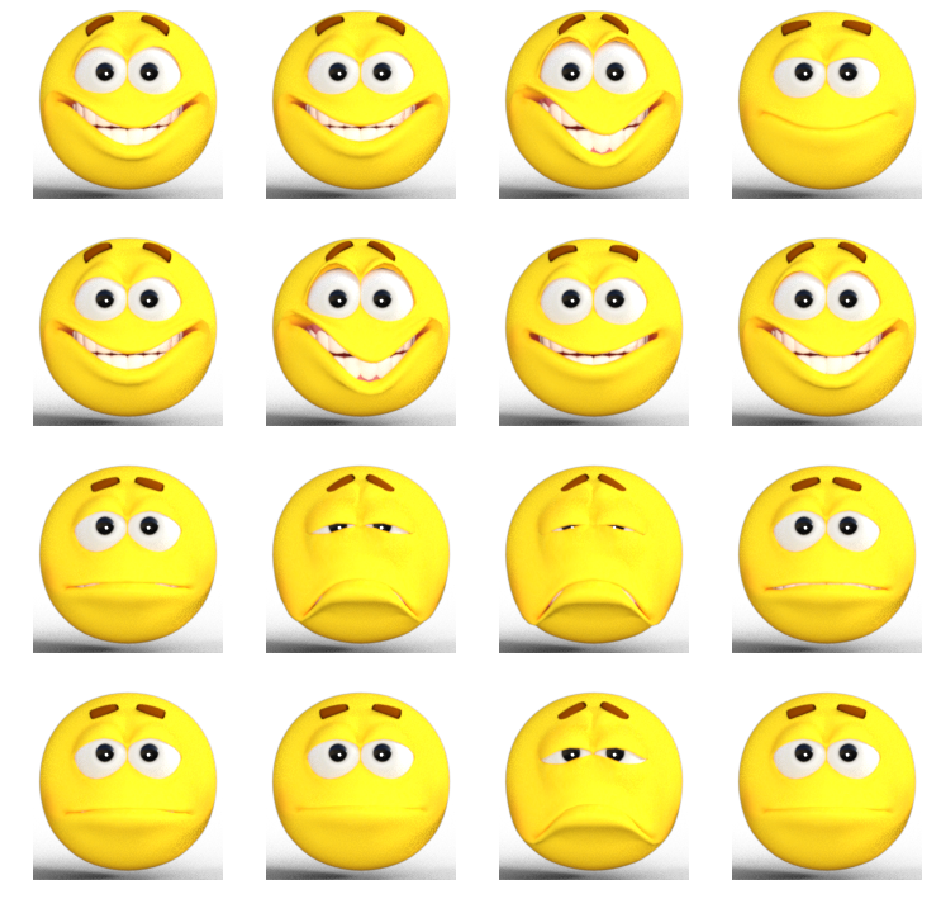

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=30,
      verbose=1,
      callbacks=[callbacks])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
8/8 [==============================] - 3s 395ms/step - loss: 0.7391 - acc: 0.6125
Epoch 2/30
8/8 [==============================] - 0s 37ms/step - loss: 0.7336 - acc: 0.7875
Epoch 3/30
8/8 [==============================] - 0s 45ms/step - loss: 0.3543 - acc: 0.8875
Epoch 4/30
8/8 [==============================] - 0s 25ms/step - loss: 0.2170 - acc: 0.9250
Epoch 5/30
8/8 [==============================] - 0s 37ms/step - loss: 0.2066 - acc: 0.9375
Epoch 6/30
8/8 [==============================] - 0s 27ms/step - loss: 0.1957 - acc: 0.8875
Epoch 7/30
8/8 [==============================] - 0s 30ms/step - loss: 0.1141 - acc: 0.9625
Epoch 8/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0886 - acc: 0.9500
Epoch 9/30
8/8 [==============================] - 0s 36ms/step - loss: 0.1185 - acc: 0.9250
Epoch 10/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0418 - acc: 0.9875
Epoch 11/30
7/8 [=============

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


load an image and test it

In [16]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")

Saving images (1).jpg to images (1) (1).jpg
[1.]
images (1).jpg is happy
